In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from showdown_randbats_elo_scraper import *

In [47]:
def generate_ticks(elo_csv):
    """create array with dates for locations where the date changes"""
    elo_df = pd.read_csv(elo_csv)

    #obtain list of dates
    tick_label_array = [elo_df['datetime'][0][:10]]
    tick_positions = [0]
    
    for i in range(1, len(elo_df['datetime'])):

        current_date = elo_df['datetime'][i][:10]
        prev_date = elo_df['datetime'][i-1][:10]

        if prev_date != current_date:
            tick_label_array.append(current_date)
            tick_positions.append(i)
            
    return tick_positions, tick_label_array

def generate_chart(elo_csv):
    
    elo_df = pd.read_csv(elo_csv)
    #create and present plot
    fig, ax = plt.subplots()
    plt.plot(range(1,len(elo_df['datetime'])+1), elo_df['Elo'])
    
    tick_positions = generate_ticks(elo_csv)[0]
    tick_label_array = generate_ticks(elo_csv)[1]

    ax.set_xticks(ticks = tick_positions, labels = tick_label_array)
    plt.xticks(rotation = 90)

    for x in tick_positions:
        plt.axvline(x=x, color = 'k', linewidth = 0.25, linestyle = '--')

    ax.set_xlabel('Date')
    ax.set_ylabel('Elo')
    ax.set_title('Gen 9 Random Battle Elo Over Time')
    plt.show()

/Users/Cheks/Desktop/Projects Practice/Coding Practice/Showdown Scraper/showdown_randbats_elo_scraper.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  randbats_elos = randbats_elos.append(new_row, ignore_index = True)


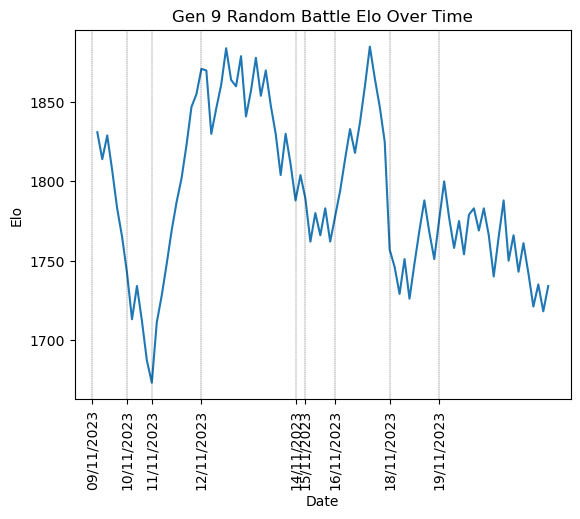

In [56]:
update_csv()
generate_chart('./randbats_elo.csv')